In [1]:
import json
%matplotlib inline
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams['figure.figsize'] = (20, 15)

In [51]:
main_file_location = "/home/valerio/workspace/caltech/genedesc_generator/generated_descriptions/"
files_to_load = ["zfin_with_stats.json", "wb_with_stats.json", "fb_with_stats.json", "sgd_with_stats.json", 
                 "rgd_with_stats.json", "mgi_with_stats.json"]

## Stats for all Alliance organisms

Stats for: zfin
total number of genes: 37375
num genes with non empty go sentence: 20062
average number of terms before trimming 6.11
average number of terms after trimming 3.74
number of descriptions with less than 4 terms in total before trimming 7671
number of descriptions with less than 4 terms in total after trimming 10668
average number of Function terms before trimming 2.05
average number of Function terms after trimming 1.10
average number of Process terms before trimming 2.41
average number of Process terms after trimming 1.50
average number of Component terms before trimming 1.64
average number of Component terms after trimming 1.14
maximum number of terms before trimming 79
worst case before trimming: mib1
maximum number of terms after trimming 24

previous case after trimming with description:
mib1: Exhibits ubiquitin-protein transferase activity and protein homodimerization activity; is involved in cellular developmental process, anatomical structure formation involved in 

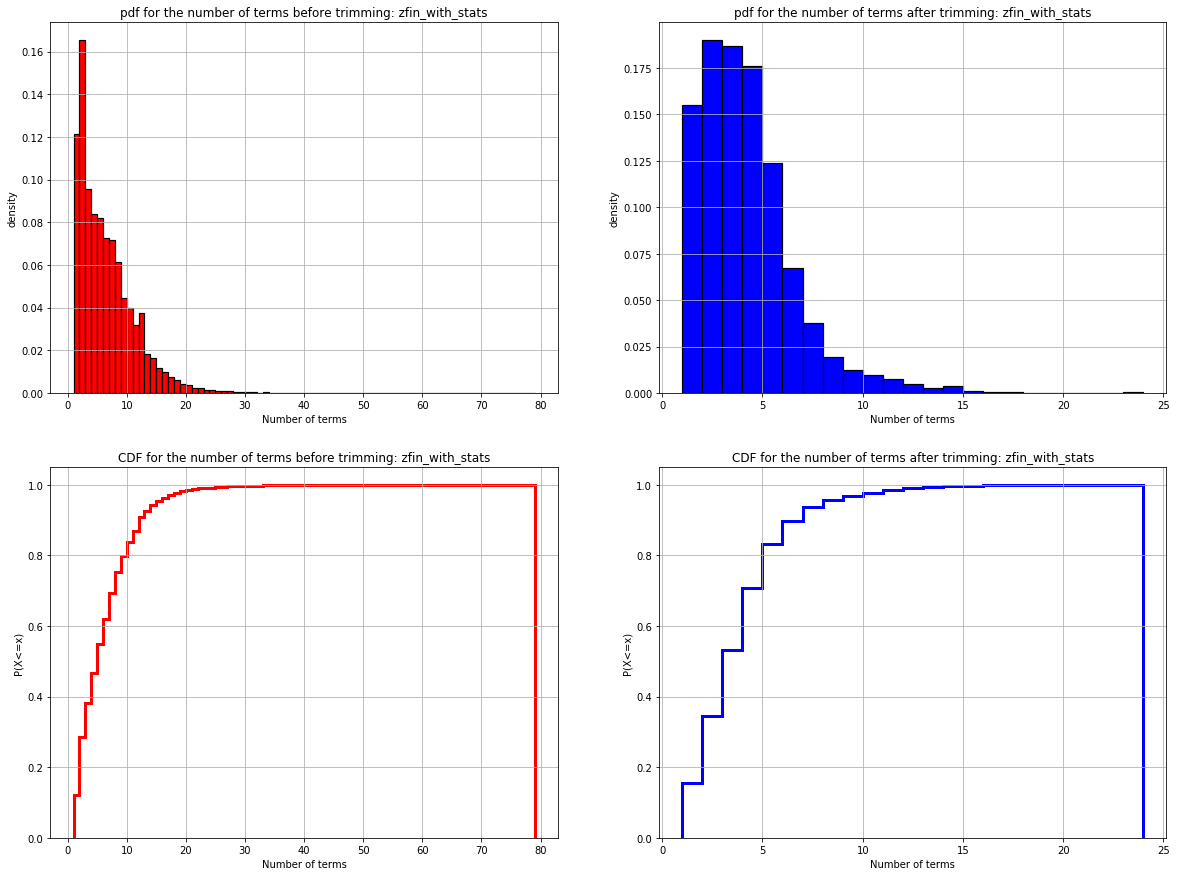



Stats for: wb
total number of genes: 47882
num genes with non empty go sentence: 14936
average number of terms before trimming 6.56
average number of terms after trimming 3.83
number of descriptions with less than 4 terms in total before trimming 6325
number of descriptions with less than 4 terms in total after trimming 8499
average number of Function terms before trimming 1.63
average number of Function terms after trimming 0.84
average number of Process terms before trimming 3.13
average number of Process terms after trimming 1.75
average number of Component terms before trimming 1.80
average number of Component terms after trimming 1.24
maximum number of terms before trimming 57
worst case before trimming: daf-2
maximum number of terms after trimming 24

previous case after trimming with description:
daf-2: Exhibits ptb domain binding, sh2 domain binding, and protein kinase binding; is involved in dormancy process, larval behavior, multicellular organism development, feeding behav

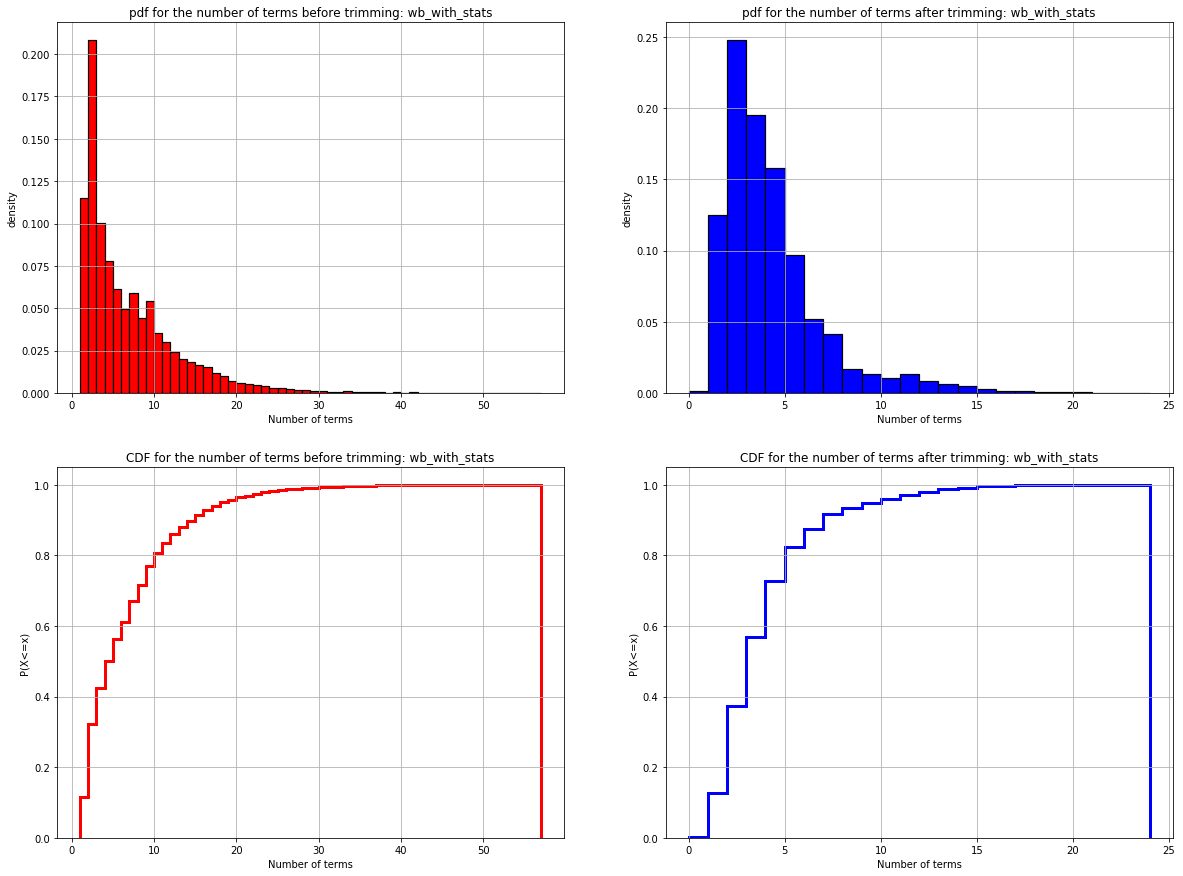



Stats for: fb
total number of genes: 30743
num genes with non empty go sentence: 12439
average number of terms before trimming 5.82
average number of terms after trimming 4.42
number of descriptions with less than 4 terms in total before trimming 5595
number of descriptions with less than 4 terms in total after trimming 7113
average number of Function terms before trimming 1.38
average number of Function terms after trimming 0.97
average number of Process terms before trimming 3.05
average number of Process terms after trimming 2.43
average number of Component terms before trimming 1.38
average number of Component terms after trimming 1.01
maximum number of terms before trimming 100
worst case before trimming: N
maximum number of terms after trimming 38

previous case after trimming with description:
N: Exhibits chromatin binding; is involved in hemocyte differentiation, cellular component organization, cellular process involved in reproduction in multicellular organism, regulation o

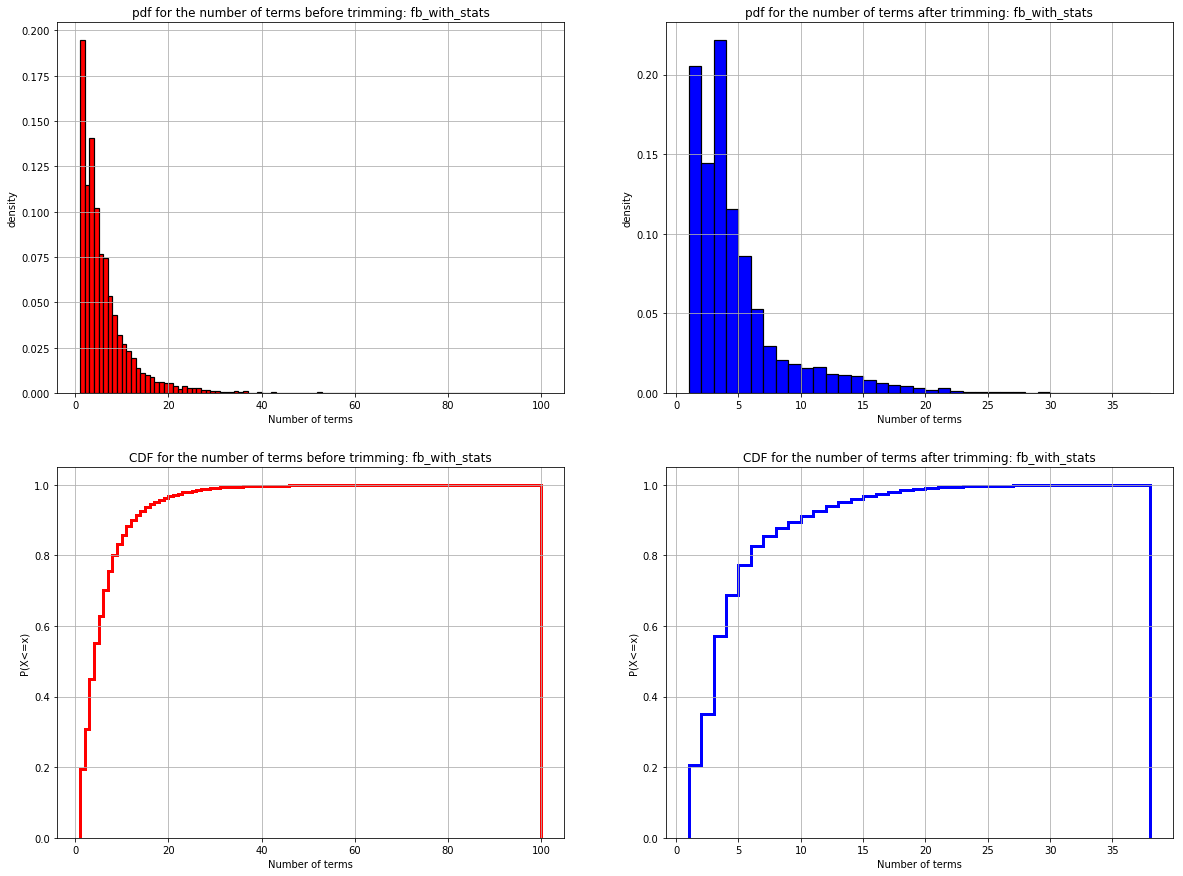



Stats for: sgd
total number of genes: 7470
num genes with non empty go sentence: 6079
average number of terms before trimming 10.58
average number of terms after trimming 5.25
number of descriptions with less than 4 terms in total before trimming 854
number of descriptions with less than 4 terms in total after trimming 1947
average number of Function terms before trimming 2.84
average number of Function terms after trimming 1.09
average number of Process terms before trimming 4.15
average number of Process terms after trimming 2.39
average number of Component terms before trimming 3.59
average number of Component terms after trimming 1.77
maximum number of terms before trimming 62
worst case before trimming: CDC28
maximum number of terms after trimming 31

previous case after trimming with description:
CDC28: Exhibits histone binding, rna polymerase ii core binding, and cyclin-dependent protein serine/threonine kinase activity; is involved in regulation of biological quality, establi

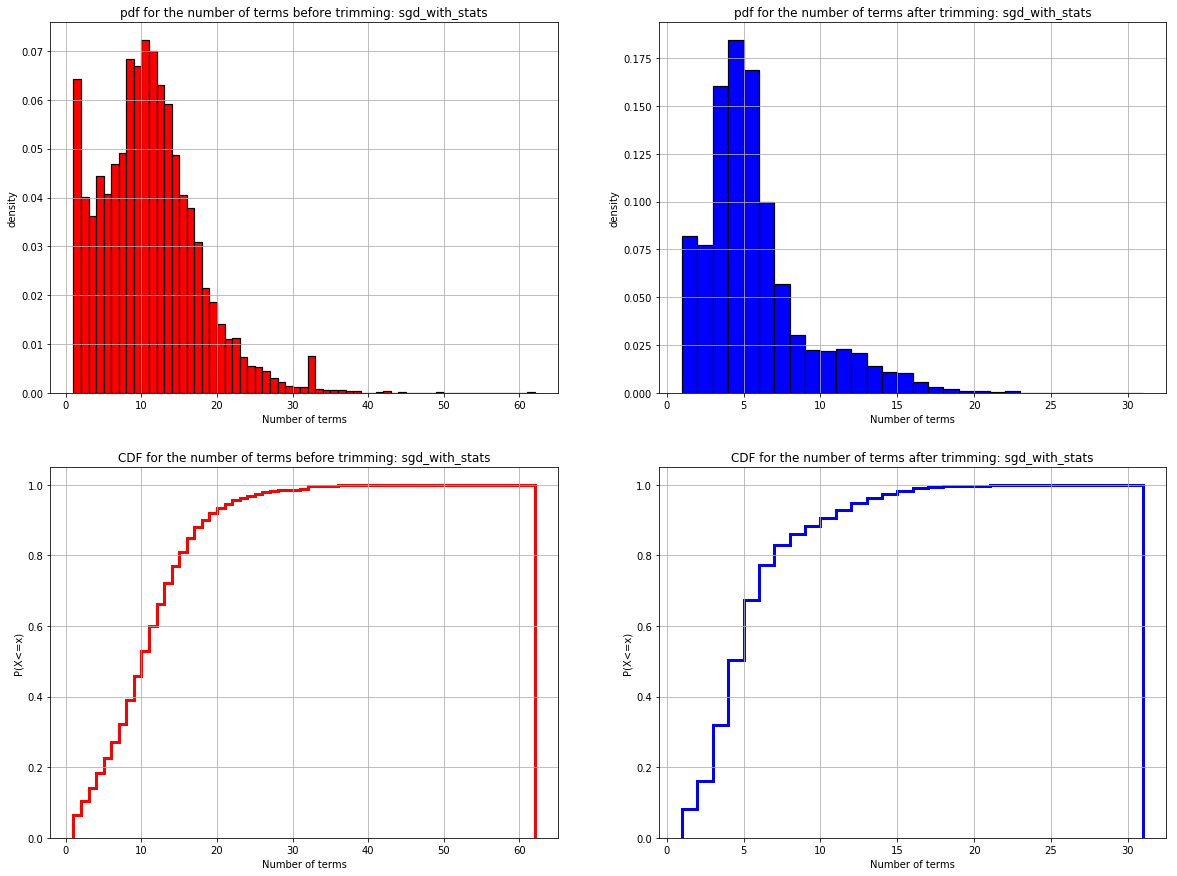



Stats for: rgd
total number of genes: 41290
num genes with non empty go sentence: 19189
average number of terms before trimming 12.93
average number of terms after trimming 6.25
number of descriptions with less than 4 terms in total before trimming 3294
number of descriptions with less than 4 terms in total after trimming 5226
average number of Function terms before trimming 2.70
average number of Function terms after trimming 1.47
average number of Process terms before trimming 6.58
average number of Process terms after trimming 3.00
average number of Component terms before trimming 3.64
average number of Component terms after trimming 1.78
maximum number of terms before trimming 256
worst case before trimming: Ctnnb1
maximum number of terms after trimming 38

previous case after trimming with description:
Ctnnb1: Exhibits receptor binding, cell adhesion molecule binding, and enzyme binding; is involved in cellular developmental process, response to abiotic stimulus, cellular respon

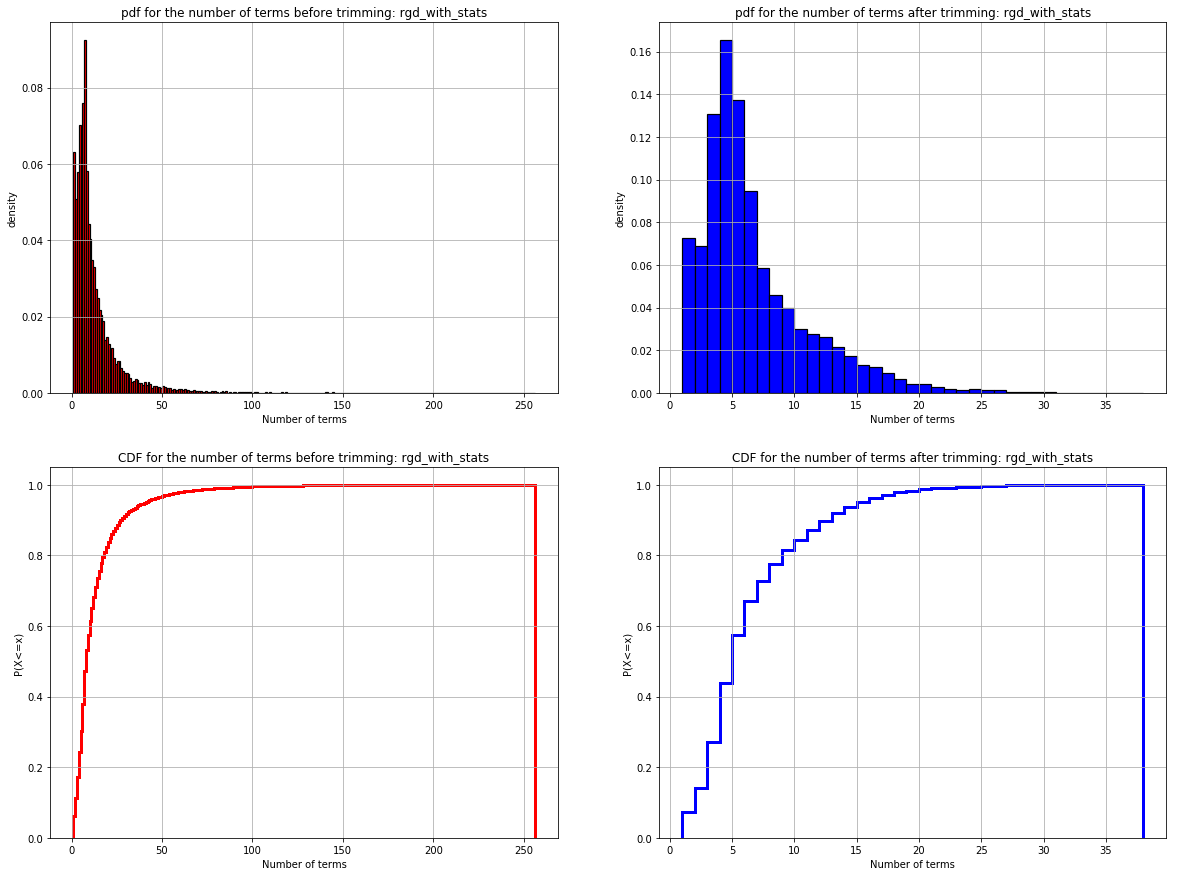



Stats for: mgi
total number of genes: 69979
num genes with non empty go sentence: 19823
average number of terms before trimming 13.99
average number of terms after trimming 5.97
number of descriptions with less than 4 terms in total before trimming 3089
number of descriptions with less than 4 terms in total after trimming 5764
average number of Function terms before trimming 3.30
average number of Function terms after trimming 1.34
average number of Process terms before trimming 6.55
average number of Process terms after trimming 2.97
average number of Component terms before trimming 4.15
average number of Component terms after trimming 1.66
maximum number of terms before trimming 248
worst case before trimming: Ctnnb1
maximum number of terms after trimming 44

previous case after trimming with description:
Ctnnb1: Exhibits receptor binding, transcription factor binding, transcription cofactor activity, nucleic acid binding, protein domain specific binding, protein dimerization activ

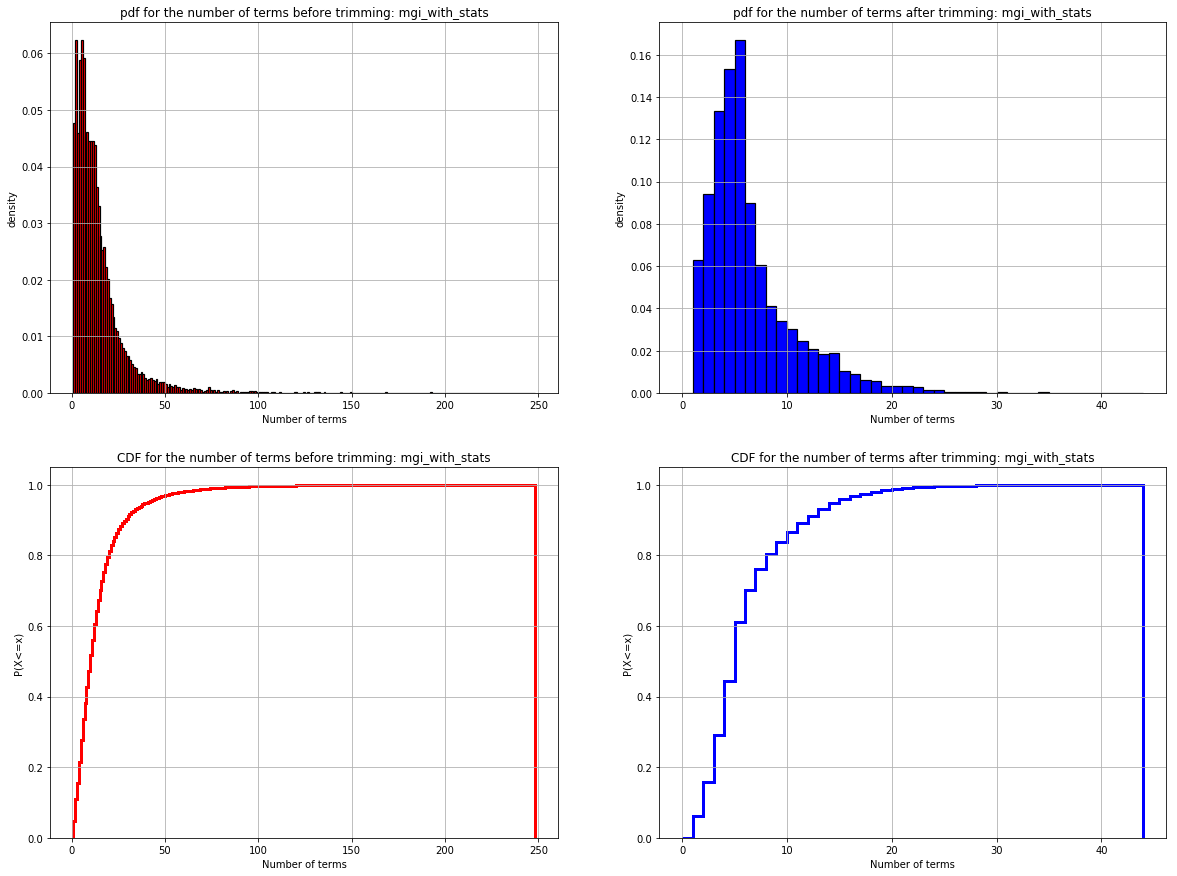

In [52]:
for file_to_load in files_to_load:
    json_str = json.load(open(main_file_location + file_to_load))
    organism = file_to_load.replace("_with_stats.json", "")
    print("Stats for:", organism)
    print("total number of genes:", len(json_str["data"]))
    print("num genes with non empty go sentence:", 
          json_str["general_stats"]["num_genes_with_go_sentence"])
    print("average number of terms before trimming", 
          "{0:.2f}".format(json_str["general_stats"]["average_num_go_terms_if_desc_notrim_nogroup_priority_nomerge"]))
    print("average number of terms after trimming", 
          "{0:.2f}".format(json_str["general_stats"]["average_num_go_terms_if_desc_trim_group_priority_merge"]))
    print("number of descriptions with less than 4 terms in total before trimming", len(
        [gene_desc for gene_desc in json_str["data"] if sum(
            gene_desc["stats"]["num_terms_notrim_nogroup_priority_nomerge"].values()) < 4 and 
            gene_desc["description"] != "No description available"]))
    print("number of descriptions with less than 4 terms in total after trimming", len(
        [gene_desc for gene_desc in json_str["data"] if sum(
            gene_desc["stats"]["num_terms_trim_group_priority_merge"].values()) < 4 and 
            gene_desc["description"] != "No description available"]))
    max_num_terms_notrim = max([sum(gene_desc["stats"]["num_terms_notrim_nogroup_priority_nomerge"].values()) for 
                                gene_desc in json_str["data"] if gene_desc["description"] != "No description available"])
    print("average number of Function terms before trimming", 
          "{0:.2f}".format(np.average([gene_data["stats"]["num_terms_notrim_nogroup_priority_nomerge"]["F"] if "F" in 
                          gene_data["stats"]["num_terms_notrim_nogroup_priority_nomerge"] else 0 for 
                          gene_data in json_str["data"] if gene_data["description"] != "No description available"])))
    print("average number of Function terms after trimming", 
          "{0:.2f}".format(np.average([gene_data["stats"]["num_terms_trim_group_priority_merge"]["F"] if "F" in 
                          gene_data["stats"]["num_terms_trim_group_priority_merge"] else 0 for 
                          gene_data in json_str["data"] if gene_data["description"] != "No description available"])))
    print("average number of Process terms before trimming", 
          "{0:.2f}".format(np.average([gene_data["stats"]["num_terms_notrim_nogroup_priority_nomerge"]["P"] if "P" in 
                          gene_data["stats"]["num_terms_notrim_nogroup_priority_nomerge"] else 0 for 
                          gene_data in json_str["data"] if gene_data["description"] != "No description available"])))
    print("average number of Process terms after trimming", 
          "{0:.2f}".format(np.average([gene_data["stats"]["num_terms_trim_group_priority_merge"]["P"] if "P" in 
                          gene_data["stats"]["num_terms_trim_group_priority_merge"] else 0 for 
                          gene_data in json_str["data"] if gene_data["description"] != "No description available"])))
    print("average number of Component terms before trimming", 
          "{0:.2f}".format(np.average([gene_data["stats"]["num_terms_notrim_nogroup_priority_nomerge"]["C"] if "C" in 
                          gene_data["stats"]["num_terms_notrim_nogroup_priority_nomerge"] else 0 for 
                          gene_data in json_str["data"] if gene_data["description"] != "No description available"])))
    print("average number of Component terms after trimming", 
          "{0:.2f}".format(np.average([gene_data["stats"]["num_terms_trim_group_priority_merge"]["C"] if "C" in 
                          gene_data["stats"]["num_terms_trim_group_priority_merge"] else 0 for 
                          gene_data in json_str["data"] if gene_data["description"] != "No description available"])))
    print("maximum number of terms before trimming", max_num_terms_notrim)
    print("worst case before trimming:", 
          [gene_desc["gene_name"] for gene_desc in json_str["data"] if 
           sum(gene_desc["stats"]["num_terms_notrim_nogroup_priority_nomerge"].values()) == 
           max_num_terms_notrim][0])
    max_num_terms_trim = max([sum(gene_desc["stats"]["num_terms_trim_group_priority_merge"].values()) for 
                              gene_desc in json_str["data"] if gene_desc["description"] != "No description available"])
    print("maximum number of terms after trimming", max_num_terms_trim)
    print()
    print("previous case after trimming with description:") 
    print([gene_desc["gene_name"] + ": " + gene_desc["description"] for gene_desc in 
           json_str["data"] if 
           sum(gene_desc["stats"]["num_terms_notrim_nogroup_priority_nomerge"].values()) == 
           max_num_terms_notrim][0])
    organism = file_to_load.replace(".json", "")
    binwidth = 1
    plt.subplot(2, 2, 1)
    plt.grid(True)
    data = [sum(gene_desc["stats"]["num_terms_notrim_nogroup_priority_nomerge"].values()) for 
            gene_desc in json_str["data"] if gene_desc["description"] != "No description available"]
    plt.hist(data, normed=1, cumulative=False, linestyle='solid', color='red',  
             edgecolor='black', linewidth=1.2, bins=range(min(data), max(data) + binwidth, binwidth))
    plt.xlabel('Number of terms')
    plt.ylabel('density')
    plt.title('pdf for the number of terms before trimming: ' + organism)
    
    plt.subplot(2, 2, 2)
    data = [sum(gene_desc["stats"]["num_terms_trim_group_priority_merge"].values()) for 
            gene_desc in json_str["data"] if gene_desc["description"] != "No description available"]
    plt.hist(data, normed=1, cumulative=False, color='blue', edgecolor='black', 
             linewidth=1.2, bins=range(min(data), max(data) + binwidth, binwidth))
    plt.xlabel('Number of terms')
    plt.ylabel('density')
    plt.title('pdf for the number of terms after trimming: ' + organism)
    plt.grid(True)
    
    plt.subplot(2, 2, 3)
    data = [sum(gene_desc["stats"]["num_terms_notrim_nogroup_priority_nomerge"].values()) for 
            gene_desc in json_str["data"] if gene_desc["description"] != "No description available"]
    plt.hist(data, normed=1, cumulative=True, histtype='step', edgecolor='red', 
             linewidth=3, bins=range(min(data), max(data) + binwidth, binwidth))
    plt.xlabel('Number of terms')
    plt.ylabel('P(X<=x)')
    plt.title('CDF for the number of terms before trimming: ' + organism)
    plt.grid(True)
    
    plt.subplot(2, 2, 4)
    data = [sum(gene_desc["stats"]["num_terms_trim_group_priority_merge"].values()) for 
            gene_desc in json_str["data"] if gene_desc["description"] != "No description available"]
    plt.hist(data, normed=1, cumulative=True, histtype='step', edgecolor='blue', 
             linewidth=3, bins=range(min(data), max(data) + binwidth, binwidth))
    plt.xlabel('Number of terms')
    plt.ylabel('P(X<=x)')
    plt.title('CDF for the number of terms after trimming: ' + organism)
    plt.grid(True)
    plt.show()
    print()
    print()
